# **Data Discord**
##### Structure of the DataFrame :
- **ID** : id of the message from discord (unique key)
- **Name** : discord username or channel ({channel_name} in {guild_name})
- **Type** : type of message channel (DM, GROUP_DM, GUILD_TEXT, GUILD_VOICE, PUBLIC_THREAD)
- **Timestamp** : date in %Y-%m-%d %H:%M:%S format
- **Contents** : content of the message
- **Attachments** : image, file link to the message

In [25]:
import json
import os
import re
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from collections import defaultdict
from fonctions import *
from fonctions_extract import *
from collections import Counter
from textblob import TextBlob
from tabulate import tabulate
df = pd.read_csv("package_sola_messages.csv")

## Extraction of the package

In [9]:
package_name = ask_package()

Package name :  package.zip


In [7]:
extract_zip(package_name) #if the package is not already extracted

In [10]:
INDEX_PATH = f"{package_name[:-4]}/messages/index.json"
MESSAGES_PATH = f"{package_name[:-4]}/messages"

if os.path.exists(f"{package_name[:-4]}_messages.csv"):
    df = pd.read_csv(f"{package_name[:-4]}_messages.csv")
else:
    df = create_dataframe(MESSAGES_PATH, get_conversion_name_dict(INDEX_PATH))
df.to_csv(f"{package_name[:-4]}_messages.csv", index=False)

## Data visualization

#### Global all time

In [11]:
top_10_messages(df)

========  ===========================  ====================================  ===============================================  ===================================================
TOP 10    DM                           GROUP_DM                              GUILD_TEXT                                       PUBLIC_THREAD
========  ===========================  ====================================  ===============================================  ===================================================
1         solafleur - 296 672          Peaky Blindés 🕵🚬 ඞ - 23 564          🌌-mudae-2 in Virgule du 4' - 102 264            sad in Virgule du 4' - 408
2         jooojx - 37 019              Only Banger - 8 594                   👑-les-bros-général in Virgule du 4' - 74 754    Myan in Virgule du 4' - 55
3         busto_ - 17 311              IRL OU J'ME TUE - 3 810               🌌-mudae in Virgule du 4' - 66 835               Arthur in Virgule du 4' - 44
4         _noko. - 16 660              🤙😔 ඞ - 2

In [18]:
df.Date

0          2023-07-23
1          2023-06-18
2          2023-06-18
3          2023-06-18
4          2023-06-18
              ...    
1102310    2022-07-17
1102311    2022-07-17
1102312    2022-07-17
1102313    2022-07-17
1102314    2022-07-17
Name: Date, Length: 1102315, dtype: object

In [2]:
message_statistics(df)

╒═══════════════╤═════════╤══════════════╤══════════════════╕
│ Type          │ Count   │ Percentage   │ Median Size      │
╞═══════════════╪═════════╪══════════════╪══════════════════╡
│ DM            │ 468 384 │ 42.49 %      │ 21.00 characters │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ GROUP_DM      │ 57 265  │ 5.19 %       │ 22.00 characters │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ GUILD_TEXT    │ 576 044 │ 52.26 %      │ 3.00 characters  │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ PUBLIC_THREAD │ 610     │ 0.06 %       │ 3.00 characters  │
╘═══════════════╧═════════╧══════════════╧══════════════════╛


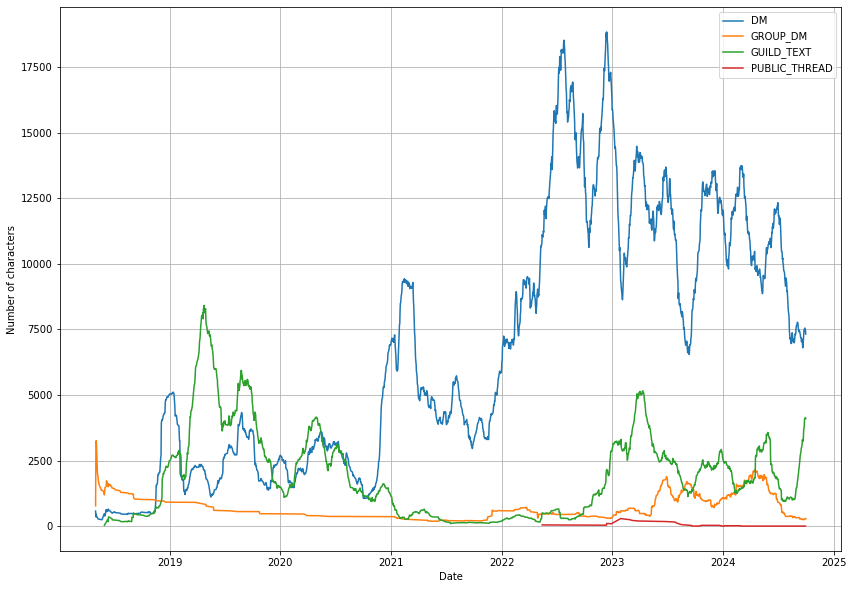

In [32]:
plot_message_statistics(df, window=50, type="character")

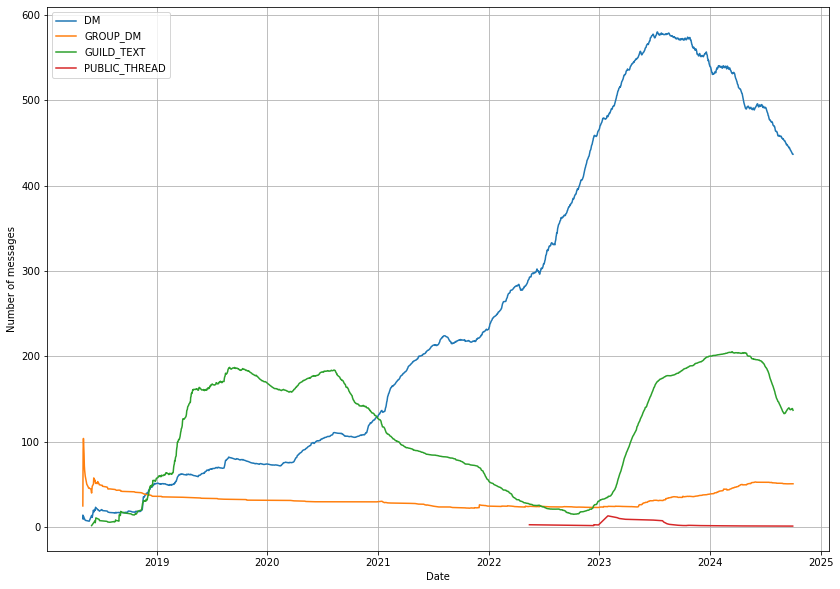

In [29]:
plot_message_statistics(df, window=500)

In [ ]:
taille_message(df)

In [ ]:
stop_words = {"je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles",
              "le", "la", "les", "l'", "au", "aux", "du", "des", "de", "un", "une",
              "mon", "ma", "mes", "ton", "ta", "tes", "son", "sa", "ses", "ce", "cette", "ces", "moi", "toi",
              "quel", "quelle", "quels", "quelles", "que", "quoi", "qui", "quand", "dont", "où",
              "mais", "ou", "et", "donc", "or", "ni", "car", "ne", "pas", "sans", "si", "plus", "moins", "ni",
              "ça", "ca", "en", "a", "est", "à", "y", "suis", "es", "sommes", "êtes", "sont", "ai", "as", "avons", "avez", "ont",
              "c'est", "j'ai", "va", "t'as", "me", "sur", "là", "oe", "avec", "coup", "enfin",
              "pour", "bien", "dans", "oui", "ouais", "non", "nn", "nan", "bon", "dans", "fait", "tout", "comme", "même",
              "après", "avant", "j'suis", "trop", "c'était", "vraiment", "genre", "faire", "vrai", "juste", "aussi", "peu",
              "te", "t'aime", "veux", "y'a", "sais", "dit", "t'es", "alors", "peux", "rien", "dire", "fais", "pcq"
        }
import pandas as pd
from collections import Counter

def clean_and_count(text, word_counts, stop_words):
    '''
    Clean and normalize the text: lowercase and count words.
    '''

    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace() or char == "'").lower()
    words = cleaned_text.split()
    for word in words:
        if word not in stop_words:
            word_counts[word] += 1

def analyze_word_usage(df):
    '''
    Analyze the most frequently used words in the 'Contents' column of the DataFrame.
    '''

    word_counts = Counter()
    df['Contents'].apply(lambda text: clean_and_count(text, word_counts, stop_words))

    most_common_words = word_counts.most_common(10)
    print("Most frequently used words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

analyze_word_usage(df[df["Name"] == "nathsus"])


## Certain Date

Top 10 since a certain date

In [ ]:
top_10_messages(df_date(df))

In [ ]:
df[df["Timestamp"] == df["Timestamp"].max()]["Contents"].values[0]